In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
!pip install scikit-optimize
from google.colab import drive
drive.mount('/content/drive')
!pwd

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content


In [21]:
df=pd.read_csv('drive/My Drive/Colab Notebooks/lgd.csv')
df.head()
df.describe()

,LTV,Recovery_rate,lgd_time,y_logistic,lnrr,Y_probit,purpose1,event
count,2545.000000,2545.000000,2545.000000,2545.000000,2545.000000,2545.000000,2545.000000,2545.000000
mean,0.676556,0.771870,0.228130,-3.941343,-0.996647,-1.650813,0.072692,0.713949
std,0.364127,0.329109,0.329109,6.073280,2.699960,2.304122,0.259681,0.452002
min,0.001359,0.000010,0.000010,-11.512915,-11.512925,-4.264891,0.000000,0.000000
25%,0.399181,0.602146,0.000010,-11.512915,-0.507256,-4.264891,0.000000,0.000000
50%,0.659417,0.967934,0.032066,-3.407383,-0.032591,-1.851268,0.000000,1.000000
75%,0.923548,0.999990,0.397854,-0.414414,0.000000,-0.258905,0.000000,1.000000
max,1.984065,0.999990,0.999990,11.512915,0.000000,4.264891,1.000000,1.000000


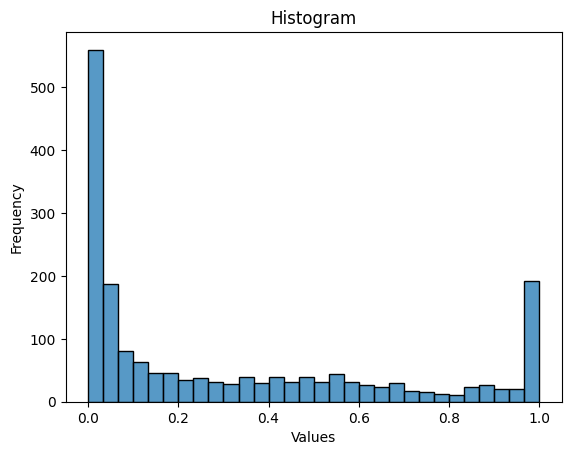

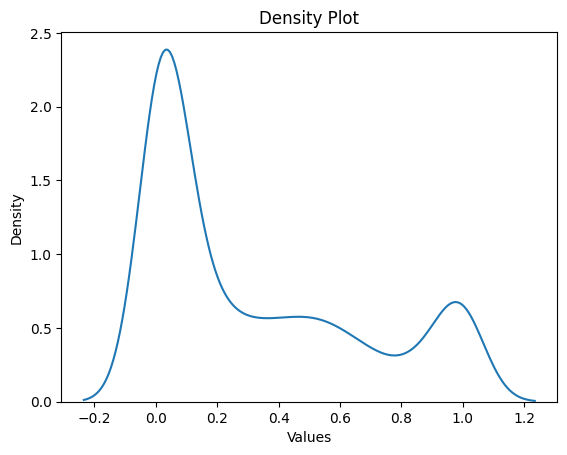

In [22]:
import seaborn as sns
df=df[df['event']!=0]
# Assuming your DataFrame is called 'df' and the column you want to plot is called 'column_name'
data = df['lgd_time']

# Plotting the histogram using Seaborn
sns.histplot(data, bins=30)
plt.xlabel('Values')  # Set the x-axis label
plt.ylabel('Frequency')  # Set the y-axis label
plt.title('Histogram')  # Set the plot title

# Display the histogram
plt.show()

# Plotting the density using Seaborn
sns.kdeplot(data)
plt.xlabel('Values')  # Set the x-axis label
plt.ylabel('Density')  # Set the y-axis label
plt.title('Density Plot')  # Set the plot title

# Display the density plot
plt.show()

In [23]:
df.head()

,LTV,Recovery_rate,lgd_time,y_logistic,lnrr,Y_probit,purpose1,event
0,0.214078,0.698016,0.301984,-0.837866,-0.359514,-0.518701,0,1
1,0.214078,0.780084,0.219916,-1.266157,-0.248354,-0.772477,0,1
2,0.214078,0.702287,0.297713,-0.858212,-0.353413,-0.530989,0,1
3,0.214078,0.753989,0.246011,-1.120001,-0.282378,-0.687096,0,1
4,0.214078,0.802813,0.197187,-1.403967,-0.219634,-0.851711,0,1


R-squared score: 0.1286046877799205


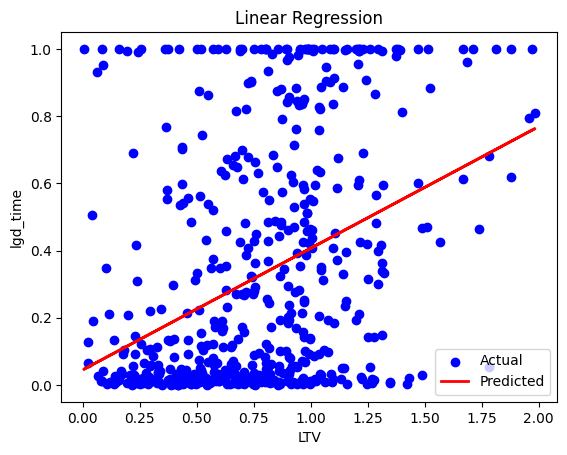

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Assuming your DataFrame is called 'df' and the columns you want to use for X and y are 'LTV' and 'lgd_time', respectively
X = df['LTV'].values.reshape(-1, 1)
y = df['lgd_time']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and fit the linear regression model
reg = LinearRegression()
reg.fit(X_train, y_train)

# Predict the target variable
y_pred = reg.predict(X_test)

# Calculate the R-squared score
r2 = r2_score(y_test, y_pred)
print("R-squared score:", r2)

# Plot the regression line and scatter points
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.xlabel('LTV')
plt.ylabel('lgd_time')
plt.title('Linear Regression')
plt.legend()
plt.show()

Epoch 1/100
56/56 [==============================] - 1s 4ms/step - loss: 0.1604
Epoch 2/100
56/56 [==============================] - 0s 3ms/step - loss: 0.1604
Epoch 3/100
56/56 [==============================] - 0s 2ms/step - loss: 0.1604
Epoch 4/100
56/56 [==============================] - 0s 2ms/step - loss: 0.1604
Epoch 5/100
56/56 [==============================] - 0s 2ms/step - loss: 0.1604
Epoch 6/100
56/56 [==============================] - 0s 2ms/step - loss: 0.1604
Epoch 7/100
56/56 [==============================] - 0s 4ms/step - loss: 0.1604
Epoch 8/100
56/56 [==============================] - 0s 3ms/step - loss: 0.1604
Epoch 9/100
56/56 [==============================] - 0s 3ms/step - loss: 0.1604
Epoch 10/100
56/56 [==============================] - 0s 4ms/step - loss: 0.1604
Epoch 11/100
56/56 [==============================] - 0s 3ms/step - loss: 0.1604
Epoch 12/100
56/56 [==============================] - 0s 5ms/step - loss: 0.1604
Epoch 13/100
56/56 [=================

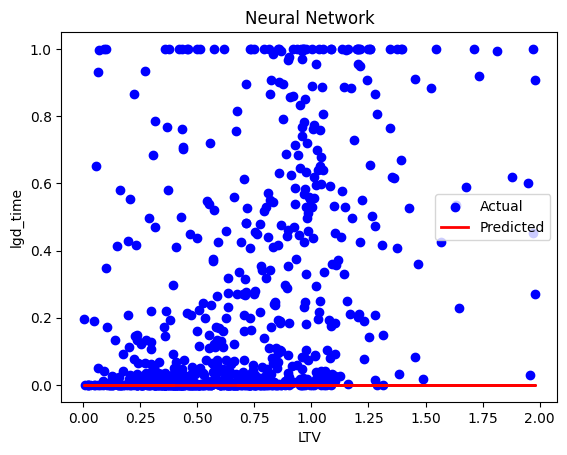

In [19]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
# Create the neural network model
model = Sequential()
# Configure the optimizer with a specific learning rate
learning_rate = 0.01
optimizer = Adam(learning_rate=learning_rate)
# Add the first hidden layer with logit activation
model.add(Dense(10, input_dim=X_train.shape[1], activation='relu'))
# Add the output layer with a single neuron and sigmoid activation
model.add(Dense(1, activation='relu'))

# Compile the model
model.compile(loss='mse', optimizer='adam')

# Train the model on the training data
model.fit(X_train, y_train, epochs=100, batch_size=32)
y_pred=model.predict(X_test)

# Calculate the R-squared score
r2 = r2_score(y_test, y_pred)
print("R-squared score:", r2)
# Plot the regression line and scatter points
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.xlabel('LTV')
plt.ylabel('lgd_time')
plt.title('Neural Network')
plt.legend()
plt.show()